ESTE ANALISIS NO ESTÁ TERMINADO, Y NO FUE NECESARIO DADO QUE UTILIZAMOS LOS OTROS DOS DATASETS

In [1]:
import pandas as pd

In [37]:
df_envios = pd.read_csv('./data/envios.txt', delimiter="|", infer_datetime_format=True, parse_dates=[0], index_col=[0])
df_envios.head()

,id_pos,unidades_despachadas,cantidad_envios
fecha,,,
2012-08-17,5235,36,1
2012-08-24,4611,48,1
2012-08-24,4645,48,1
2012-08-24,4649,72,1
2012-08-24,4677,72,1


In [38]:
df_envios.describe(include='all')

,id_pos,unidades_despachadas,cantidad_envios
count,42434.000000,42434.000000,42434.000000
mean,9453.247632,35.532827,1.000165
std,5678.198406,32.258875,0.012843
min,3142.000000,12.000000,1.000000
25%,5487.000000,12.000000,1.000000
50%,7720.500000,24.000000,1.000000
75%,12792.000000,48.000000,1.000000
max,63432.000000,528.000000,2.000000


In [58]:
df_envios[["unidades_despachadas", "cantidad_envios"]].resample("M").sum()[lambda df: df.unidades_despachadas > 0 ]
#.index.month.unique()
#.plot.box(subplots=True)

Int64Index([8, 10, 11, 12, 9], dtype='int64', name='fecha')

In [60]:
df_envios.resample("M").sum()[lambda df: df.unidades_despachadas > 0 ].groupby("id_pos").sum()

,unidades_despachadas,cantidad_envios
id_pos,,
21726,204,3
285346,2808,36
352679,1032,28
749628,1320,110
880692,12060,151
1033571,11676,171
2637853,6000,300
60310492,344484,7785
70077679,401616,8351


In [61]:
#solo tiene ventas para estos meses
df_envios.loc[lambda df: df.index.month.isin([8,9,10,11,12,1])]


,id_pos,unidades_despachadas,cantidad_envios
fecha,,,
2012-08-17,5235,36,1
2012-08-24,4611,48,1
2012-08-24,4645,48,1
2012-08-24,4649,72,1
2012-08-24,4677,72,1
2012-08-24,4876,60,1
2012-08-24,4886,36,1
2012-08-24,4888,84,1
2012-08-24,4924,84,1


In [66]:
len(df_envios.id_pos.unique())

13449

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4f3ea8668>,
      dtype=object)

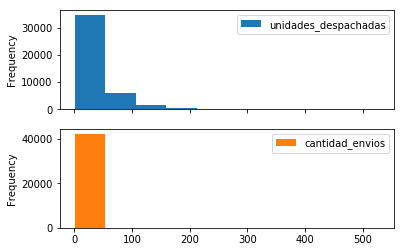

In [33]:
df_envios[["unidades_despachadas", "cantidad_envios"]].plot.hist(subplots=True)

In [22]:
df_envios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42434 entries, 0 to 42433
Data columns (total 4 columns):
fecha                   42434 non-null datetime64[ns]
id_pos                  42434 non-null int64
unidades_despachadas    42434 non-null int64
cantidad_envios         42434 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.3 MB


In [74]:
df_pos = pd.read_csv('./data/pos.csv')
df_pos[df_pos.id_pos.isna()]
# df_pos.id_pos = df_pos.id_pos.astype('int32')
# df_pos[lambda df: df.id_pos > 0].head(20)

,id_pos,competidores,ingreso_mediana,ingreso_promedio,densidad_poblacional,pct_0a5,pct_5a9,pct_10a14,pct_15a19,pct_20a24,...,pct_bachelors,pct_doctorados,pct_secundario,pct_master,pct_bicicleta,pct_omnibus,pct_subtes,pct_taxi,pct_caminata,mediana_valor_hogar
13078,NaN,2.0,66331.43000,85606.13000,12313.340000,6.470000,6.460000,6.300000,6.180000,5.210000,...,11.750000,0.850000,36.580000,5.140000,0.850000,3.030000,0.000000,0.000000,4.760000,458194.4600
13079,NaN,133.0,57921.00333,79957.38000,66753.156670,5.106667,4.746667,4.643333,4.276667,6.866667,...,22.016667,1.360000,28.026667,9.003333,0.603333,2.136667,13.270000,1.416667,13.903333,327276.4733
13080,NaN,61.0,56369.13714,72461.41714,12778.280000,5.880000,6.187143,6.665714,6.017143,6.825714,...,17.557143,1.040000,29.670000,6.594286,0.212857,1.152857,0.105714,0.022857,1.398571,160753.4743
13081,NaN,35.0,61595.09571,81751.50429,10818.247140,5.071429,5.582857,5.724286,6.515714,7.522857,...,20.980000,2.280000,24.861429,9.612857,1.702857,2.412857,0.161429,0.081429,2.875714,260698.8471
13082,NaN,8.0,45075.23667,56575.89667,5898.586667,6.196667,6.590000,6.826667,6.110000,5.543333,...,10.776667,0.410000,31.863333,4.313333,0.046667,0.220000,0.000000,0.043333,1.763333,128591.3067
13083,NaN,1.0,107121.07000,134710.07000,7928.580000,5.770000,7.140000,7.350000,6.900000,5.580000,...,22.610000,1.260000,29.960000,10.620000,0.030000,8.670000,0.000000,0.000000,1.020000,407918.1000
13084,NaN,15.0,53055.75500,66417.55250,5506.777500,5.842500,6.435000,6.680000,7.510000,7.972500,...,13.740000,0.850000,37.512500,6.092500,0.947500,0.300000,0.000000,0.630000,4.155000,180425.6250
13085,NaN,12.0,70911.10500,92701.46000,12978.367500,6.947500,7.022500,6.695000,5.920000,5.655000,...,22.167500,1.005000,24.007500,8.937500,0.185000,3.610000,0.805000,0.042500,1.897500,361472.8250
13086,NaN,0.0,38598.50000,49715.00000,233.420000,7.690000,5.565000,6.350000,7.905000,6.980000,...,6.780000,0.105000,40.500000,2.025000,0.000000,0.250000,0.000000,0.000000,25.220000,95789.5000
13087,NaN,70.0,54994.92750,73518.49188,7710.796250,5.886250,6.016250,5.987500,6.217500,7.638750,...,18.456250,1.353125,28.688125,7.747500,0.410625,1.696875,0.183125,0.091250,2.443750,215640.6781


In [23]:
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13375 entries, 0 to 13374
Data columns (total 33 columns):
id_pos                  13265 non-null object
competidores            13228 non-null float64
ingreso_mediana         13255 non-null float64
ingreso_promedio        13255 non-null float64
densidad_poblacional    13254 non-null float64
pct_0a5                 13256 non-null float64
pct_5a9                 13254 non-null float64
pct_10a14               13254 non-null float64
pct_15a19               13256 non-null float64
pct_20a24               13254 non-null float64
pct_25a29               13254 non-null float64
pct_30a34               13254 non-null float64
pct_35a39               13254 non-null float64
pct_40a44               13254 non-null float64
pct_45a49               13254 non-null float64
pct_50a54               13254 non-null float64
pct_55a59               13254 non-null float64
pct_60a64               13254 non-null float64
pct_65a69               13254 non-null float64

In [13]:
df_pos.describe(include='all')

,id_pos,competidores,ingreso_mediana,ingreso_promedio,densidad_poblacional,pct_0a5,pct_5a9,pct_10a14,pct_15a19,pct_20a24,...,pct_bachelors,pct_doctorados,pct_secundario,pct_master,pct_bicicleta,pct_omnibus,pct_subtes,pct_taxi,pct_caminata,mediana_valor_hogar
count,13265,13228.000000,13255.000000,13255.000000,13254.000000,13256.000000,13254.000000,13254.000000,13256.000000,13254.000000,...,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,1.325600e+04
unique,12934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,26.942093,55246.302913,72583.559634,11560.079662,6.028763,6.111135,6.054291,6.442756,7.753941,...,18.043834,1.311318,28.586624,7.697663,0.616105,2.240169,1.426847,0.139632,3.622325,2.180152e+05
std,NaN,48.640683,14956.105565,19058.394087,16075.949863,1.241332,1.185604,1.183307,1.844200,3.821274,...,6.029791,1.019936,6.789028,3.445855,0.828500,2.695583,5.133737,0.334497,3.925638,1.222221e+05
min,NaN,0.000000,15519.520000,22629.590000,0.050000,0.000000,0.000000,0.000000,0.120000,0.270000,...,1.950000,0.000000,3.590000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,NaN,4.000000,45749.675000,60149.599335,4569.852273,5.410000,5.520000,5.480000,5.653333,6.020000,...,14.166354,0.682589,24.670000,5.410000,0.160000,0.630278,0.000000,0.000000,1.616875,1.439204e+05
50%,NaN,14.000000,53975.180000,70706.733330,8497.115000,5.991682,6.099167,6.064583,6.209444,7.014000,...,18.135500,1.134688,28.036125,7.470357,0.413333,1.572662,0.072500,0.045420,2.567321,1.964381e+05
75%,NaN,32.000000,62144.407835,81347.835665,12858.229583,6.595875,6.696667,6.692000,6.852050,8.320706,...,21.399330,1.675929,32.200000,9.381187,0.768000,2.860000,0.539605,0.140000,4.160000,2.576443e+05


In [25]:
df_ventas = pd.read_csv('./data/ventas.txt', delimiter = "|", infer_datetime_format=True, parse_dates=[0])
df_ventas.head()

,fecha,id_pos,unidades,canal
0,2012-10-01,8495,4,MAXIKIOSCO
1,2012-10-10,8571,1,MAXIKIOSCO
2,2012-10-11,8915,1,MAXIKIOSCO
3,2012-10-12,8915,3,MAXIKIOSCO
4,2012-10-13,8923,1,MAXIKIOSCO


In [26]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266436 entries, 0 to 266435
Data columns (total 4 columns):
fecha       266436 non-null datetime64[ns]
id_pos      266436 non-null int64
unidades    266436 non-null int64
canal       266436 non-null object
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 8.1+ MB


In [27]:
df_ventas.describe(include='all')

,fecha,id_pos,unidades,canal
count,266436,266436.000000,266436.000000,266436
unique,276,NaN,NaN,4
top,2013-12-24 00:00:00,NaN,NaN,ALMACEN
freq,9726,NaN,NaN,265207
first,2012-10-01 00:00:00,NaN,NaN,NaN
last,2014-11-30 00:00:00,NaN,NaN,NaN
mean,NaN,7973.083667,2.378481,NaN
std,NaN,4707.704857,2.391836,NaN
min,NaN,3142.000000,-29.000000,NaN
25%,NaN,4964.000000,1.000000,NaN
